<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###마스크 연산

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [32]:
def handle_image(num):
  img = cv2.imread("/content/drive/MyDrive/mask/PNY0000%d.PNG" %(num))  #원본 이미지
  mask = cv2.imread("/content/drive/MyDrive/mask/PNY0000%d_mask.png"%(num))  #마스크 이미지
  #BGR to RGB
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #비트연산
  # bit_and = cv2.bitwise_and(img_rgb, mask)  #객체 검출
  bit_or = cv2.bitwise_or(img_rgb, mask)  #배경 검출
  #배경과 객체 다시 합치기
  # combine = cv2.bitwise_xor(bit_and, bit_or)
  #RGB to BGR
  result_bgr = cv2.cvtColor(bit_or,cv2.COLOR_RGB2BGR)
  #저장
  cv2.imwrite("/content/drive/MyDrive/result/bg/bg%d.png"%(num),result_bgr)


In [33]:
handle_image(1)

###이미지 합치기

In [84]:
src2 = cv2.imread('/content/drive/MyDrive/result/mask/seed0000.png') #꽃
src1 = cv2.imread('/content/drive/MyDrive/result/bg/bg11-1.png') #배경
 
rows, cols, channels = src2.shape #꽃파일 픽셀값 저장
roi = src1[0:rows,0:cols] #꽃 파일 필셀값을 관심영역(ROI)으로 저장함. 

In [85]:
gray = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY) #꽃파일의 색상을 그레이로 변경
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY) #배경은 흰색으로, 그림을 검정색으로 변경
mask_inv = cv2.bitwise_not(mask)

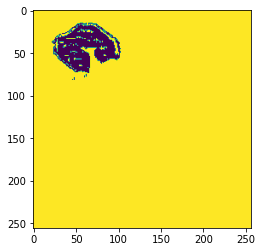

In [86]:
plt.imshow(mask) #배경 흰색, 로고 검정

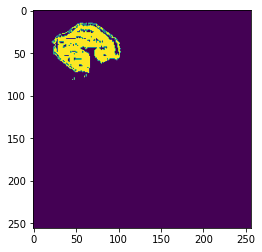

In [87]:
plt.imshow(mask_inv) # 배경 검정, 로고 흰색

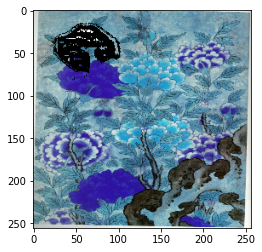

In [88]:
src1_bg = cv2.bitwise_and(roi,roi,mask=mask) #배경에서만 연산 = src1 배경 복사
plt.imshow(src1_bg)

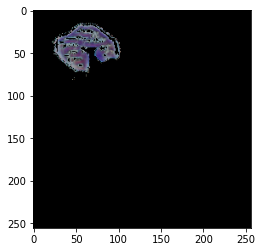

In [89]:
src2_fg = cv2.bitwise_and(src2,src2, mask = mask_inv) #로고에서만 연산
plt.imshow(src2_fg)


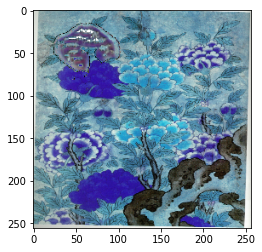

In [90]:
dst = cv2.bitwise_or(src1_bg, src2_fg) #src1_bg와 src2_fg를 합성
plt.imshow(dst)
 


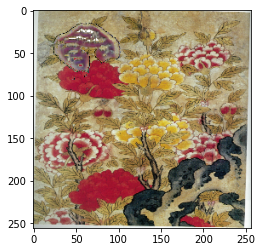

In [91]:
src1[0:rows,0:cols] = dst #src1에 dst값 합성

src1_rgb = cv2.cvtColor(src1,cv2.COLOR_BGR2RGB)
 
plt.imshow(src1_rgb)

In [ ]:
for i in range(1,7):
  handle_image(i)

###이미지 출력(확인)

In [ ]:
img = cv2.imread("/content/drive/MyDrive/mask/PNY00001.png")  #원본 이미지
mask = cv2.imread("/content/drive/MyDrive/mask/PNY00001_mask.png")  #마스크 이미지

In [ ]:
# #BGR to RGB
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

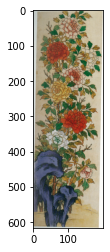

In [ ]:
#원본 이미지
plt.imshow(img_rgb)

In [ ]:
# #비트연산
bit_and = cv2.bitwise_and(img_rgb, mask)  #객체 검출
bit_or = cv2.bitwise_or(img_rgb, mask)  #배경 검출

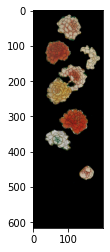

In [ ]:
#객체 검출
mask_and = plt.imshow(bit_and)

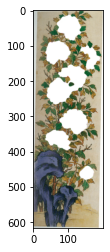

In [ ]:
#배경 검출
mask_or = plt.imshow(bit_or)

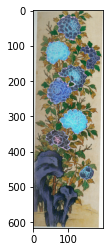

In [ ]:
#배경과 객체 다시 합치기
combine = cv2.bitwise_xor(bit_and, bit_or)
view_combine = plt.imshow(combine)

In [ ]:
#RGB to BGR
result_bgr = cv2.cvtColor(combine,cv2.COLOR_RGB2BGR)

In [ ]:
#저장
cv2.imwrite("/content/drive/MyDrive/result/mask/result.png",result_bgr)

True